In [123]:
import numpy as np
import matplotlib.pyplot as plot
import cv2
from skimage import img_as_float
import skimage.exposure
import scipy.signal

#### Questão 1
 No Editor, faça um vetor amostra = [15 29 5 8 255 40 1 0 10]; a. Crie uma função que ordene este vetor em ordem crescente de valores, e chame este novo vetor de amostraOrdenada. Obs.: pode usar → np.sort b. Crie uma variável mediana, para receber a mediana da amostra ordenada.


In [ ]:
#criando o vetor V_AMOSTRA
v_amostra = np.array([15, 29, 5, 8, 255, 40, 1, 0, 10])
#função que ordena o vetor em ordem crescente 
ordenado = np.sort(v_amostra)
mediana = ordenado[4]
print('Vetor ordenado: ', ordenado)
print('Mediana: ', mediana)

Vetor ordenado:  [  0   1   5   8  10  15  29  40 255]
Mediana:  10


#### Questão 2
Ler, normalizar e exibir a imagem 

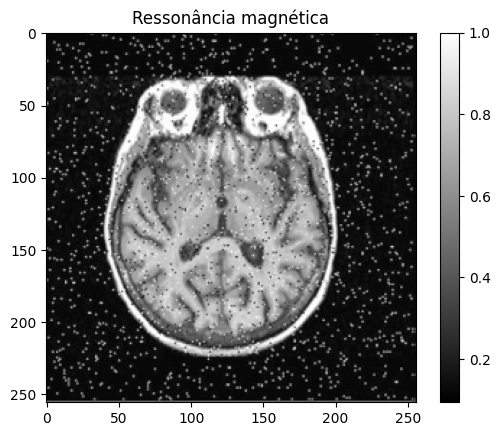

In [125]:
image_res = cv2.imread(r"C:\Unifesp\imagens_biomedicas\aula4_mascaras_filtragem\TransversalMRI_salt-and-pepper.pgm",0)
#normalizando 
image_norm = skimage.img_as_float(image_res)
#Exibindo a imagem:
#Exibir a imagem (mamogarfia)
plot.figure(0)
plot.imshow(image_norm,cmap = 'gray')
plot.title('Ressonância magnética')
plot.colorbar()
plot.show()


In [126]:
#Pegando o tamanho da matriz
(M,N) = np.shape(image_norm)

#criandomatriz de zeros para receber o tamanho da image_norm
matriz_zeros = np.zeros((M,N), float)

#### Fazer um filtro mediana **FORÇA BRUTA**
a. Crie uma função que use uma máscara 3x3 para varrer a imagem e
retornar a mediana local para a posição correspondente em
IMRIfiltrada. obs.: usar as funções “np.concatenate” e “np.sort” podem ajudar)

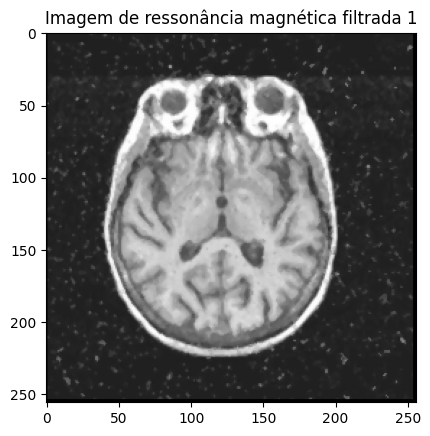

In [127]:
#Criando um kernel 3x3
w = np.ones((3,3), float) #tudo com 1, pois todo número multiplicado por 1 é o próprio número.
# Observação: a image_filtrada recebe a mediana de um kernel 3x3.
for l in range(M-3):
    for c in range(N-3):
        #No Python, o fatiamento funciona como [início : fim]. O início é incluído, enquanto o fim é excluído.
        #l:l+3: define a altura da máscara(3 pixels verticais)
        #c:c+3: define a largura da máscara(3 pixels horizontais)
        amostra = w * image_norm[(l):(l)+3, (c):(c)+3]
        #Transformando a matriz amostra em um vetor.
        amostra_concatenate = np.concatenate(amostra, axis=None)
        #Odenando este vetor
        amostra_ordenada = np.sort((amostra_concatenate))
        #Valor da mediana: como o tamanho do nosso kernel e 3x3, o valor da nossa mediana vai ficar na posição 4, ou seja, [l+1,c+1]. Quando l=c=0, l=c=1.
        matriz_zeros[l+1,c+1] = amostra_ordenada[4]
        
plot.figure()
plot.title('Imagem de ressonância magnética filtrada 1')
plot.imshow(matriz_zeros, cmap = 'gray')
plot.show()


b. Fazer a mediana com a função **“scipy.signal.medfilt2d”**

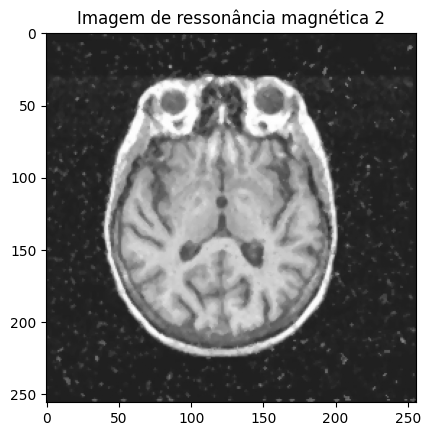

In [128]:
image_filtrada_medfilt = scipy.signal.medfilt2d(image_norm, kernel_size= 3)
plot.figure()
plot.title('Imagem de ressonância magnética 2')
plot.imshow(image_filtrada_medfilt, cmap = 'gray')


### Questão 3 (Fazer um kernel ponderado em uma distribuição gaussiana)
3. → No Editor, use a função scipy.signal.gaussian (ou implemente da fórmula 
original). Crie uma função gaussiana unidimensional (g(x)), que contenha 9 
amostras ( x =0:8), e que possua média 4 e desvio padrão de 1 
a. Plote esta função, mostre e explique para o professor. 

Text(0.5, 0, 'x')

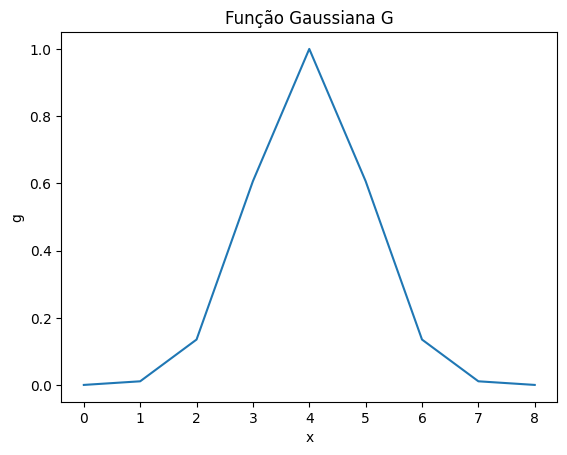

In [136]:
#criando uma função gaussiana
g = scipy.signal.windows.gaussian(9, std=1) #quantidade de amostras e std é o desvio padrão.
plot.figure()
plot.plot(g)
plot.title('Função Gaussiana G')
plot.ylabel("g")
plot.xlabel("x")

b. Construa uma máscara 2D com valores seguindo distribuição 
Gaussiana. Uma função bidimensional Gaussiana pode ser construída a 
partir da convolução da máscara unidimensional com sua transposta, 
ou seja: 
w_Gauss2D = g1* gtranspose1; 
**em outras palavras: quero colocar essa gaussiana em termos de duas dimensões.**
 $\color{cyan}{\text{*Lembrando:*}}$ **convolução**(Temos a imagem original com diferentes intensidades de pixels. O kernel escolhido possui pesos numéricos. Este kernel desliza sobre a imagagem e em cada posição multiplicamos o valor do kernel pelos valores dos pixels correspondentes da imagem. Somamos todos eles valores para gerar um único novo pixel na imagem de saída.)
$\color{green}{\text{*fundamental usada para extrair características, filtrar ruídos ou realçar detalhes importantes de um exame.*}}$


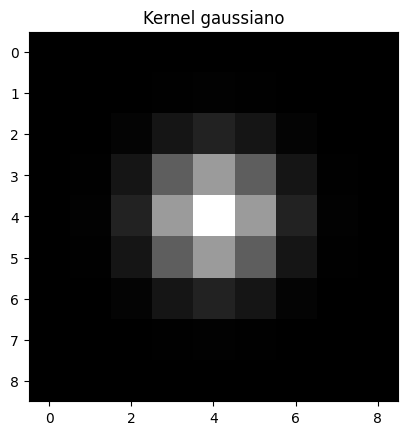

In [137]:
#nossa função aqui é criar um kernel gaussiano 2D(uma matriz quadrada) a partir da função gaussiana 1D(vetor que criamos acima).
#incialmente, criamos a matriz 9x9
g1 = np.zeros((9,9), float)
#agora colocamos o vetor gaussiano na linhha 4(que estará exatamente no meio da minha mascara)
g1[4,:] = g #(a nomenclatura que o numpy permite - chamada slicing). O 4 indica a quinta linha da matriz e o ":" indica todas as colunas da 5a linha. 
g1_transposta = np.transpose(g1)
convolucao_gaussiana1 = scipy.signal.convolve2d(g1,g1_transposta, 'same')

plot.figure()
plot.title('Kernel gaussiano')
plot.imshow(convolucao_gaussiana1, cmap = 'gray')


#### Questão 4
Faça a convolução entre a imagem mamography.pgm e a máscara Gaussiana, 
e exiba a imagem filtrada. A mesma funcionou como filtro de suavização?

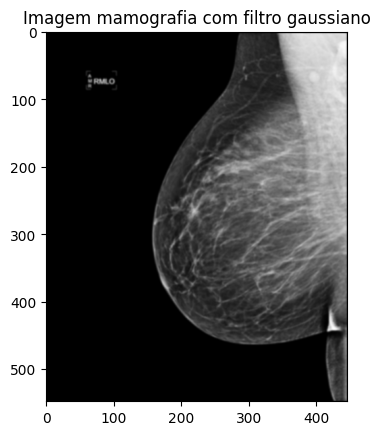

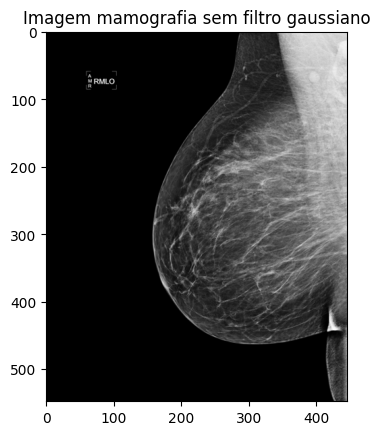

In [138]:
image_mamo = cv2.imread(r"C:\Unifesp\imagens_biomedicas\aula3_correlacao_covolucao_kernel\Mamography.pgm",0)#este zero lê a imagem preto e branco
image_mamo_norm = skimage.img_as_float(image_mamo)

#normalizando a máscara
convolucao_gaussiana1_norm = skimage.img_as_float(convolucao_gaussiana1)
#covolução
convolucao_gaussiana2 = scipy.signal.convolve2d(image_mamo_norm, convolucao_gaussiana1_norm,'same' )

#plotar gráfico
plot.figure()
plot.title('Imagem mamografia com filtro gaussiano')
plot.imshow(convolucao_gaussiana2, cmap = 'gray')

#imagem mamo sem filtro gaussiano
plot.figure()
plot.title('Imagem mamografia sem filtro gaussiano')
plot.imshow(image_mamo_norm, cmap = 'gray')

#### Questão 5 e 6
Precisamos fazer uma $\color{red}{\text{função}}$ no qual o usuário indique o desvio padrão e a média. Esta mesma função $\color{cyan}{\text{deve restornar uma máscara bidimensional com distribuição gaussiana.}}$ 


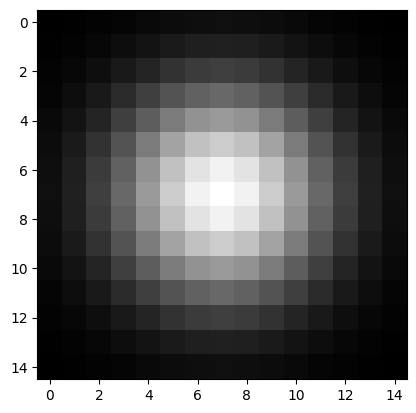

In [139]:
import bibmascara

funcao = bibmascara.fazerKernelGauss2D(media=7, desvio=3)

plot.figure()
plot.imshow(funcao, cmap = 'gray')
        

#### Questão 7: Afinamento de bordas
Filtros passa alta


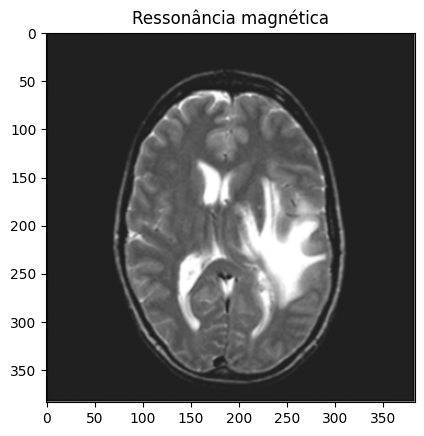

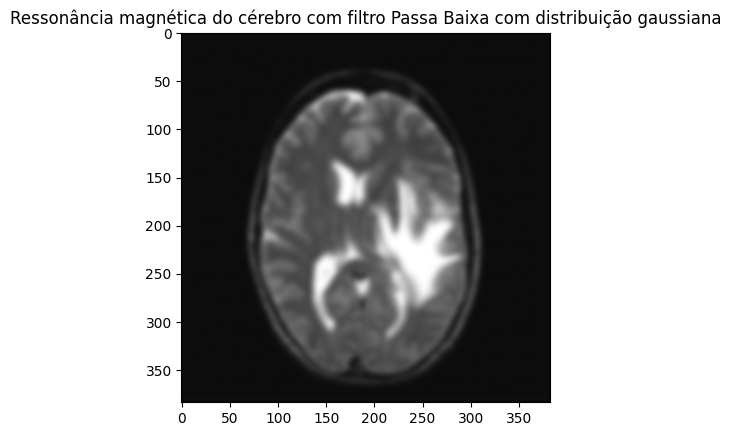

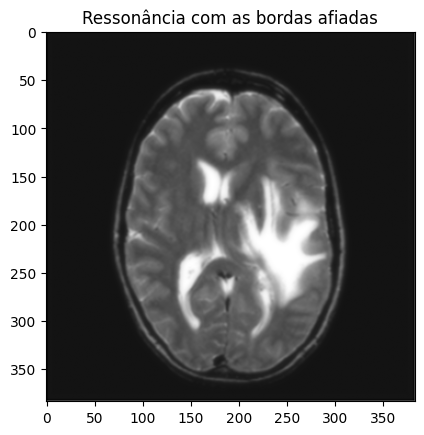

In [140]:
#abrindo a imagem original 
ressonancia = cv2.imread(r"C:\Unifesp\imagens_biomedicas\aula4_mascaras_filtragem\TransversalMRI2.pgm",0)
ressonancia_norm = skimage.img_as_float(ressonancia)

plot.figure()
plot.title('Ressonância magnética')
plot.imshow(ressonancia_norm, cmap = 'gray')

#"borrando" a imagem: filtro passa baixa(distribuição gaussiana)
ressonancia_norm_borrada = scipy.signal.convolve2d(ressonancia_norm, funcao, 'same')
plot.figure()
plot.title('Ressonância magnética do cérebro com filtro Passa Baixa com distribuição gaussiana')
plot.imshow(ressonancia_norm_borrada, cmap = 'gray')

#ressaltando a borda: utilizamos uma forma
ressonancia_afiada = ressonancia_norm + ressonancia_norm_borrada
plot.figure()
plot.title('Ressonância com as bordas afiadas')
plot.imshow(ressonancia_afiada, cmap = 'gray')


#### Questão 8: Aplicar diretamente filtro passa alta
Para a imagem Stent.pgm e Usando correlação, tire o gradiente em x em y e compute seu módulo usando as máscaras Priwitt e Sobel abaixo. Exiba o gradiente em x em y e seu módulo. Qual máscara extraiu melhor o Stent da imagem? 

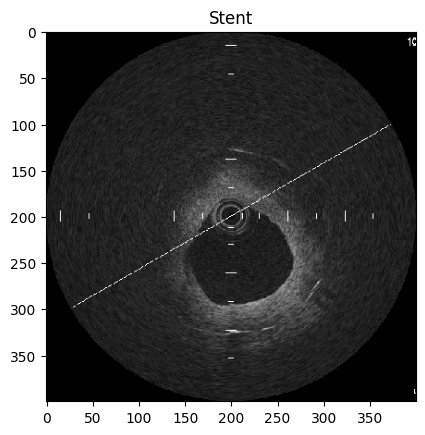

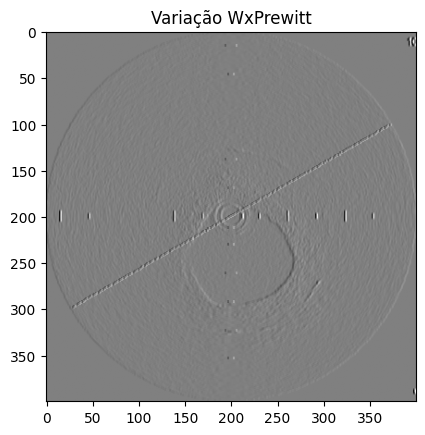

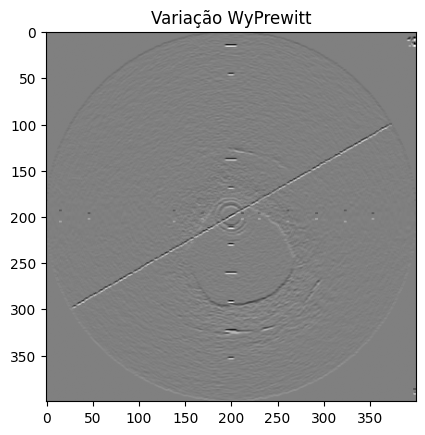

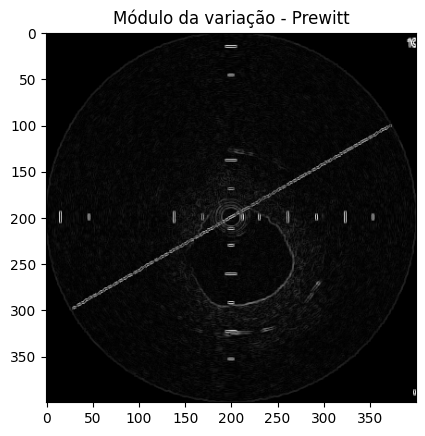

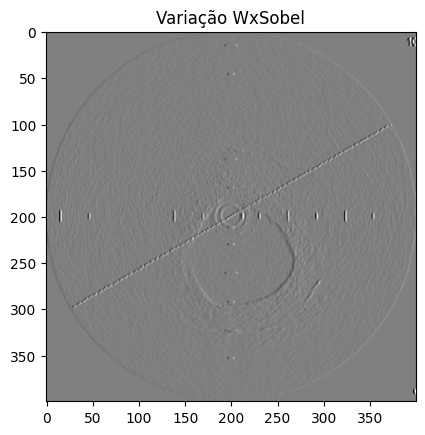

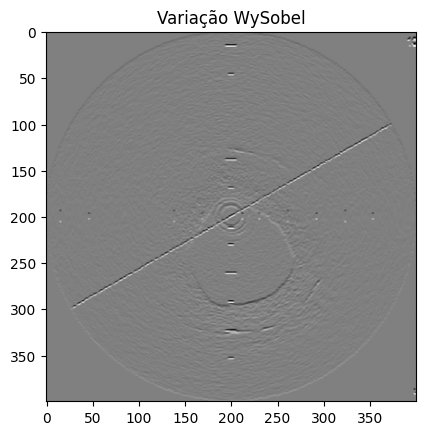

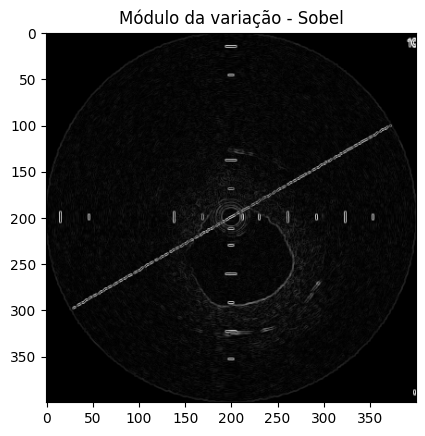

In [141]:
#ler stent
stent = cv2.imread(r"C:\Unifesp\imagens_biomedicas\aula2_transformacao_de_intensidade\Stent.pgm",0)
stent = skimage.img_as_float(stent)

plot.figure()
plot.title('Stent')
plot.imshow(stent,cmap = 'gray')

#definindo as matrizes de variação
wxPrewitt = np.array([[-1, 0, 1],[-1, 0, 1], [-1,0,1]])
wyPrewitt = np.array([[-1, -1,-1],[0, 0, 0], [1, 1, 1]])

wxSobel = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
wySobel = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

variacao_wxPrewitt = scipy.signal.convolve2d(stent,wxPrewitt, 'same')
plot.figure()
plot.title('Variação WxPrewitt')
plot.imshow(variacao_wxPrewitt, cmap ='gray')

variacao_wyPrewitt = scipy.signal.convolve2d(stent, wyPrewitt, 'same')
plot.figure()
plot.title('Variação WyPrewitt')
plot.imshow(variacao_wyPrewitt, cmap ='gray')
#queremos o módulo desta variação
#o módulo ressaltou bem a posição dos stents
modulo_Prewitt = ((variacao_wxPrewitt)**2 + (variacao_wyPrewitt)**2)**0.5
plot.figure()
plot.title('Módulo da variação - Prewitt')
plot.imshow(modulo_Prewitt, cmap = 'gray')

variacao_wxSobel = scipy.signal.convolve2d(stent,wxSobel, 'same')
plot.figure()
plot.title('Variação WxSobel')
plot.imshow(variacao_wxSobel, cmap ='gray')

variacao_wySobel = scipy.signal.convolve2d(stent,wySobel, 'same')
plot.figure()
plot.title('Variação WySobel')
plot.imshow(variacao_wySobel, cmap ='gray')

#módulo
modulo_Sobel = ((variacao_wxSobel)**2 + (variacao_wySobel)**2)**0.5
plot.figure()
plot.title('Módulo da variação - Sobel')
plot.imshow(modulo_Sobel, cmap ='gray')


$\color{yellow}{\text{Observação:}}$ As derivadas parciais em relação a x calculam a variação na horizontal e a derivada parcial em relação a y calcula a variação na vertical. Como podemos observar na WxPrewitt e na WxSobel, os detalhes na vertical foram ignorados, restando apenas o que está na horizontal. Acontece de forma contrária quando se trata do Wy.

#### Questão 9 (Laplaciano)
 Ainda para a imagem Stent.pgm e usando correlação, tire o Laplaciano  usando as duas máscaras abaixo. Exiba os dois Laplacianos. Qual máscara extraiu melhor o Stent da imagem? 

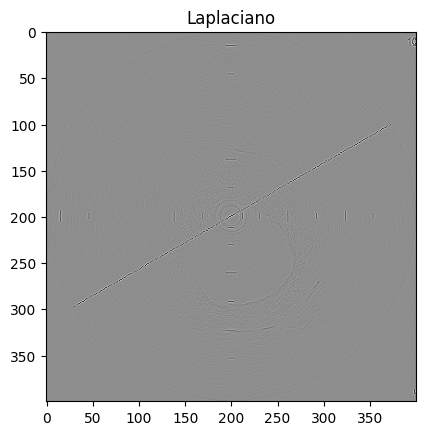

In [142]:
laplaciano = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
convLaplaciano = scipy.signal.convolve2d(stent, laplaciano, 'same') #primeiro vem a imagem e depois a máscara
plot.figure()
plot.title('Laplaciano')
plot.imshow(convLaplaciano, cmap = 'gray')
